In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

## Loading the data with classification label i.e. Cluster

In [25]:
df = pd.read_csv('./data/customer_segments.csv')
df

,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,...,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth,Cluster
0,65,2,0,0,0,58138.0,1617.0,4872.0,58,635,...,120.5,81,88.0,8,10,4,3,0,7,0
1,68,2,0,1,2,46344.0,27.0,4322.0,38,11,...,2.0,1,6.0,1,1,2,2,0,5,1
2,57,2,1,0,0,71613.0,776.0,4521.0,26,426,...,111.0,21,42.0,8,2,10,1,0,4,0
3,38,2,1,1,1,26646.0,53.0,4348.0,26,11,...,10.0,3,5.0,2,0,4,2,0,6,1
4,41,4,1,1,1,58293.0,422.0,4370.0,94,173,...,46.0,27,15.0,5,3,6,5,0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,55,2,1,1,1,61223.0,1341.0,4590.0,46,709,...,42.0,81,126.5,9,3,4,2,0,5,2
2236,76,4,1,1,3,64014.0,444.0,4228.0,56,406,...,0.0,0,8.0,8,2,5,7,1,7,2
2237,41,2,0,0,0,56981.0,1241.0,4364.0,91,908,...,32.0,12,24.0,2,3,13,1,1,6,0
2238,66,3,1,1,1,69245.0,843.0,4365.0,8,428,...,80.0,30,61.0,6,5,10,2,0,3,0


In [26]:
# Importing the modela and metrices

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [27]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

In [28]:
def evaluate_models(X, y, models):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    results = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        
        results[name] = {
            'accuracy': accuracy,
        }
        
    res_df = pd.DataFrame(results).T
    return res_df

#### Lets Evaluate models

In [29]:
X, y = df.drop('Cluster', axis=1), df['Cluster']

In [30]:
res = evaluate_models(X, y, models)

In [31]:
res.sort_values(by='accuracy', ascending=False)

,accuracy
XGBoost,0.973214
Random Forest,0.970982
Gradient Boosting,0.966518
AdaBoost,0.941964
Logistic Regression,0.879464
K-Nearest Neighbors,0.810268


* **As we can see XGBoost is the best model performing**

## Hyperparameter tunning

In [32]:
xgbparams = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }

In [33]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
gridSearch = GridSearchCV(estimator=XGBClassifier(), param_grid=xgbparams, cv=3, n_jobs=-1, verbose=2)
gridSearch.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBClassifier...ree=None, ...)"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [50, 100, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2

In [35]:
gridSearch.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}

In [36]:
accuracy_score(y_test, gridSearch.predict(X_test))

0.9702380952380952

In [37]:
X_test.shape

(672, 21)

In [38]:
best_params = {
    'n_estimators': 200,
    'learning_rate': 0.1,
    'max_depth': 5
}

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       179
           1       1.00      0.97      0.98       259
           2       0.95      0.97      0.96       234

    accuracy                           0.97       672
   macro avg       0.97      0.97      0.97       672
weighted avg       0.97      0.97      0.97       672



Text(50.722222222222214, 0.5, 'Actual')

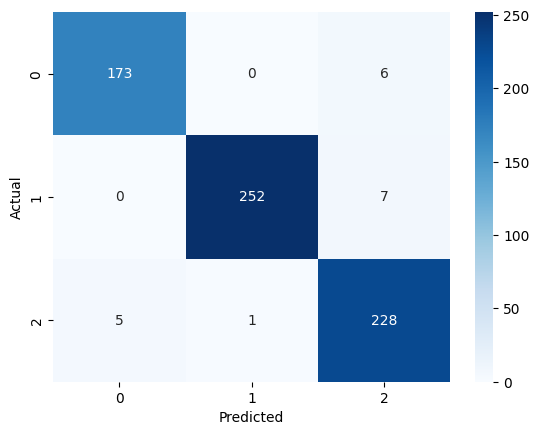

In [39]:
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')